# Red bipartita de usuarios y palabras
## Autor: Camilo Torres Botero
## Profesor: Sergio Pulido Tamayo 
Red bipartita de palabras obtenidas a partir de tweets, compuesta de dos tipos de nodos: palabras y usuarios. El objetivo de esta red es encontrar relaciones entre usuarios a partir de las palabras, dando peso a las palabras más usadas. Se esperan encontrar comunidades en las palabras que puedan clasificarse en tópicos, de los cuales se pueden sacar grupos de personas con gustos similares o temas comunes y afines. Los grupos obtenidos pueden generar interés en empresas que buscan clientes potenciales, lanzamientos de nuevos productos o segmentación del mercado.

Las siguientes son las preguntas que se pretende responder con este estudio:
<div class="alert alert-warning" role="alert">¿Qué comunidades se pueden encontrar entre usuarios a partir del lenguaje que usan?</div>
<div class="alert alert-warning" role="alert">¿Qué temas se pueden identificar como más comentados por los usuarios?</div>
<div class="alert alert-warning" role="alert">¿Es posible identificar algún segmento de mercado en las comunidades obtenidas?</div>
<div class="alert alert-warning" role="alert">¿Es posible pensar en un producto que se pueda ofrecer a alguna de las comunidades obtenidas?</div>

## Limpieza de la base de datos
La base de datos se encuenta almacenada en MongoDB debido a que cada tweet está en formato json. A través de un script en python se realiza la conexión a la base de datos con el fin de crear en un archivo de texto la red bipartita de usuarios y palabras. El script se encuentra en la carpeta del proyecto y se llama "get_network_data.py".

Dentro de la base de datos existe una colección llamada "tweets_users" que contiene los usuarios y por cada usuario las palabras que han usado en los tweets. Las palabras seleccionadas para cada usuario fueron sustantivos, adjetivos y emojis. Esto se realizó por medio de una herramienta de Standford llamada POS Tagger (Part-Of-Speech Tagger) con la cual se analizaba cada texto y se hacía la respectiva separación. Se puede ver información y documentación de la herramienta en el siguiente enlace: https://nlp.stanford.edu/software/tagger.shtml

Cada usuario puede usar una palabra o un emoji más de una vez lo cual se usa como el peso en los enlaces de la red, igualmente este peso es tenido en cuenta en le momento de realizar las proyecciones de la red.

A continuación se muestra un ejemplo de un registro de la colección "tweets_users":
<div class="alert alert-info" role="alert">
<small>
<pre> 
{
	"_id" : ObjectId("58e6c881a9f8a04c22c5a237"),
	"id" : "1070154709",
	"name" : "Daniela Fuentes✨",
	"text_emojis_nouns" : [
		"JAJAJAJJAJAJAJAJAJAJJAJAJJA",
		"❤",
		"mejor",
		"Feliz",
		"cumpleaños",
		"bendiciones",
		"😆",
		"💜",
		"💜",
		"✨",
		"✨",
		"día",
		"@villalobossebas",
		"❤",
		"Justo",
		"tantoo",
		"tengas",
		"lindo",
		"❤"
	],
	"emojis" : [
		"❤",
		"😆",
		"💜",
		"💜",
		"✨",
		"❤"
	],
	"text_types" : {
		"nouns" : [
			"JAJAJAJJAJAJAJAJAJAJJAJAJJA",
			"Feliz",
			"cumpleaños",
			"bendiciones",
			"día",
			"@villalobossebas"
		],
		"determiners" : [
			"El",
			"un"
		],
		"adjectives" : [
			"mejor",
			"✨",
			"Justo",
			"tantoo",
			"tengas",
			"lindo",
			"❤"
		],
		"prepositions" : [
			"de",
			"por",
			"de"
		],
		"pronouns" : [
			"todos",
			"❤",
			"esto",
			"te",
			"que"
		],
		"adverbs" : [
			"siempre",
			"@JoseGaleanoR"
		],
		"punctuation" : [
			",",
			",",
			",",
			","
		],
		"conjunctions" : [
			"cuando"
		],
		"verbs" : [
			"estoy",
			"apuntó",
			"dormir",
			"llega",
			"amo"
		]
	}
}
</pre>
</small>
</div>

Dentro del campo "text_emojis_nouns" se encuentran ya separados los sustantivos, adjetivos y emojis necesarios para armar la red. Como se puede ver en el json, hay palabras que deben ser limpiadas de los registros debido a que el POS tagger las clasificó como adjetivos o sustantivos de manera erronea. Por ejemplo los "jajaja" o algunos adverbios o verbos mal clasificados.

La limpieza de todos estos caracteres ruidosos para la red se realizó en varias fases:

El primer paso es hacer una limpieza en el momento de la creación del archivo de texto con los enlaces, es decir, en el archivo "get_network_data.py" remover la mayor cantidad de palabras ruidosas que se pueda. Para esto se usó un libería de python llamada "Natural Language Toolkit" (NLTK) con la cual se pueden hacer diferentes procesamientos para trabajar con lenguaje natural en python. Entre estos procesos está la detección de stopwords o palabras de parada que comunmente son preposiciones o conectores. Además de remover las palabras de parada, se quitaron también las palabras que comenzaban por '@' debido a que son usuarios mencionados en tweets y que fueron clasificados como sustantivos o adjetivos. Se puede obtener información de la librería NLTK en el siguiente enlace: http://www.nltk.org/

El segundo paso de la limpieza fue crear una red con NetworkX utilizando el archivo entregado por el paso anterior. A partir de esta red se creó la proyección de palabras y se analizó cada una de ellas organizadas por grado de mayor a menor. Con este proceso se encontraron palabras y caracteres que eran ruidosos para la red. Este fue un proceso manual y dió como resultado dos arreglos, uno de palabras y otro de caracteres a remover. A continuación se muestran los arreglos obtenidos:

remove_words: ['vez', 'día', 'cosas', 'dia', 'asi', '🏻', 'días', 'parte', 'man', 'fin', 'necesito', 'aqui', 'ser', 'pra', '🏼', 'sera', 'hey', 'fav', "'ll", 'aja', 'qlo', 'sdds', 'dejaste', 'sas', 'fiz', 'dan', 'heauheauehae', 'lok', 'ami', 'hablando', 'jfghdf', 'dfkjgd', '12am', "'re", 'aya', 'u.u', '🏽', '▪', '#jct', 'jasldjaslñfjasdñlasjfasd', '2016/6/25', 'xxi', 'ehh', 'aww', 'comí', 'mrc', 'prrrra', 'aksjsks', 'háblame', 'rts', '・', 'pasatela', 'hahsahsa', 'años', 'tweets', 'twitter', 'twitiir', 'twittera', '#twitteroff', 'retwits', '#twitter', '#cd', 'twiter', 'twits', 'twitt', 'twitero', 'tweetdeck', 'retweet', 'twets', 'coisas', 'delosmismoscreadoresdeperreopagomelo', 'yo-yo-yo']

remove_chars: ['jaja', 'jeje', 'kkk', 'haha', 'aaa', 'eee', 'ooo', 'iii', 'yyy', 'uff', 'ddd', 'jiji', 'zzz', 'sss', 'rrr', 'uuu', '???', 'nnn']

Por último se volvió a correr el script "get_network_data.py" agregando los arreglos obtenidos en el punto anterior y validando en la creación de los enlaces que la palabra correspondiente no se econtrara dentro del arreglo "remove_words" o que no contuviera alguna de las cadenas de caracteres del arreglo "remove_chars". Los pasos mencionados en esta limpieza se pueden observar en el script contenido en la carpeta del proyecto. 

Con esta limpieza se borraron en total 8332 palabras ruidosas para la red. 

El resultado de este proceso es un archivo de texto llamado "edges_file_total_network_weights_undirected.txt" a partir del cual se puede crear la red en python y el cual también puede ser utilizado para graficar la red en bipartita completa en gephi. 

## Librerías usadas

In [8]:
# Librerías necesarias para correr el proyecto
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import operator
import community
from scipy.stats import powerlaw
%matplotlib inline
sns.set()

## Número de nodos y enlaces
Código para leer el archivo de texto con la red y a partir del mismo obtener un arreglo con los enlaces y sus respectivos pesos, un arreglo con el total de nodos, un arreglo con los nodos de usuarios y un arreglo con los nodos de palabras.

In [9]:
"""
En el arreglo all_edges se guardan los enlaces de la red con pesos. El arreglo all_edges_aux sirve para contar 
el número de veces que aparece un enlace y así agregarlo como peso del enlace en all_edges
"""
all_edges = []
all_edges_aux = []
# Archivo de texto que contiene los enlaces de la red (se encuenta en la carpeta del proyecto)
with open('edges_file_total_network_weights_undirected.txt', encoding="utf8") as f:
    next(f)
    for line in f:
        edge = line.replace('\n', '').split('\t')
        # Condicional para validar si ya existe un enlace y agregarlo como peso
        if (edge[0], edge[1]) in all_edges_aux:
            edge_index = all_edges_aux.index((edge[0], edge[1]))
            # Se suma 1 al peso anterioir que tenía el enlace
            all_edges[edge_index] = (edge[0], edge[1], all_edges[edge_index][2] + 1)
        else:
            # Se agrega el nuevo enlace al auxiliar y al original. En el arreglo original de enlaces se inicia
            # con un peso de 1
            all_edges.append((edge[0], edge[1],1))
            all_edges_aux.append((edge[0], edge[1]))

# Total de enlaces de la red
total_count_edges = len(all_edges)

# Arreglos para almacenar nodos
all_nodes = set()
users_nodes = set()
words_nodes = set()

# Proceso para obtener los nodos de la red
for x,y,w in all_edges:
    users_nodes.add(x)
    words_nodes.add(y)
    all_nodes.add(x)
    all_nodes.add(y)
 
print("El tamaño de la red está definido por los siguientes valores:")
print("Total de enlaces:", len(all_edges))
print("Total de nodos:", len(all_nodes))
print("Total de nodos usuario:", len(users_nodes))
print("Total de nodos de palabras:", len(words_nodes))

El tamaño de la red está definido por los siguientes valores:
Total de enlaces: 25713
Total de nodos: 13574
Total de nodos usuario: 2947
Total de nodos de palabras: 10627


## Proyecciones
Código propio para hallar el total de enlaces de las proyecciones y validar con las obtenidas por medio de la librería NetworkX

In [6]:
# Sets para guardar los enlaces de la proyección de usuarios y palabras respectivamente
projection_users = set()
projection_words = set()
# Proyección de usuarios
# Se recorren todos los nodos de palabras para sacar los usuarios que las usan
for word in words_nodes:
    possible_nodes = set()
    # Si la palabra está en un enlace se agrega el usuario que la usó en un set de posibles nodos
    for edge in all_edges:
        if word in edge:
            possible_nodes.add(edge[0])
    # Se recorren los posibles nodos obtenidos anteriormente, se valida que no existan los enlaces y se agregan
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1, node2) not in projection_users and (node2, node1) not in projection_users:
                projection_users.add((node1, node2)) if (node1 != node2) else 0

# Proyección de palabras
# Se recorren todos los nodos de usuarios para sacar las palabras que usan
for user in users_nodes:
    possible_nodes = set()
    # Si el usuario está en un enlace se agrega la palabra que usó en un set de posibles nodos
    for edge in all_edges:
        if user in edge:
            possible_nodes.add(edge[1])
    # Se recorren las posibles palabras, se valida que no existan los enlaces y se argegan
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1, node2) not in projection_words and (node2, node1) not in projection_words:
                projection_words.add((node1, node2)) if (node1 != node2) else 0
                
# Resultado de las proyecciones
print("Proyeccion usuarios total enlaces:",len(projection_users))
print("Proyeccion palabras total enlaces:",len(projection_words))

Proyeccion usuarios total enlaces: 211366
Proyeccion palabras total enlaces: 295277


## Proyecciones usando NetworkX
Código para hallar las proyecciones con NetworkX. Se puede validar con el código anterior que se obtienen el mismo número de enlaces.

In [2]:
# Se crea el grafo bipartito con NetworkX
tweets_users_words_graph = nx.Graph()
# Se agregan los nodos para ambas particiones, es decir, usuarios y palabras
# Para esto es necesario importar el módulo bipartite de NetworkX
tweets_users_words_graph.add_nodes_from(users_nodes, bipartite=0)
tweets_users_words_graph.add_nodes_from(words_nodes, bipartite=1)
# Se agregan los enlaces obtenidos anteriormente con sus respectivos pesos
tweets_users_words_graph.add_weighted_edges_from(all_edges)

# Función usada para sumar los pesos de la red bipartita en las proyecciones.
# Esta función es enviada en los parametros del metodo generic_weighted_projected_graph del módulo bipartite
# Tomada de la documentación: 
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.bipartite.projection.generic_weighted_projected_graph.html
def my_weight(G, u, v, weight='weight'):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G.edge[u][nbr].get(weight, 1) + G.edge[v][nbr].get(weight, 1)
    return w

# Se hallan las proyecciones de usuarios y palabras
projected_graph_users = bipartite.generic_weighted_projected_graph(tweets_users_words_graph, users_nodes, weight_function=my_weight)
projected_graph_words = bipartite.generic_weighted_projected_graph(tweets_users_words_graph, words_nodes, weight_function=my_weight)

# Resultados de las proyecciones. Se imprimen los primeros 10 enlaces de cada proyeccion para validar que tengan
# los pesos. Se imprimen también el número de enlaces de cada proyección para validar con el punto anterior. 
print("Proyección grafo usuarios total enlaces:",projected_graph_users.edges(data=True)[0:10])
print()
print("Proyección grafo palabras total enlaces:",projected_graph_words.edges(data=True)[0:10])
print()
print("Proyección grafo usuarios total enlaces:",len(projected_graph_users.edges()))
print()
print("Proyección grafo palabras total enlaces:",len(projected_graph_words.edges()))
    

NameError: name 'nx' is not defined

## Distribución de grados para la red bipartita completa
Se grafica la distribución de grados de la red bipartita completa para validar que tenga un comportamiento cercano a la realidad donde los nodos con grados más altos son pocos y los nodos de grado bajo forman un gran pico, es decir, que se acerque a una distribución power law. 

In [3]:
# Gráfica de la distribución de grados en python
degrees_tweets_users_words_graph = list(tweets_users_words_graph.degree().values())
sns.distplot(degrees_tweets_users_words_graph)

NameError: name 'tweets_users_words_graph' is not defined

<img src="imagenes/distribucion_total_network_gephi.png">

## Distribución de grados para la red proyectada de usuarios

In [12]:
degrees_projected_graph_users = list(projected_graph_users.degree().values())
degrees_projected_graph_users = np.array(degrees_projected_graph_users)
degrees_projected_graph_users = degrees_projected_graph_users[np.nonzero(degrees_projected_graph_users)]
sns.distplot(degrees_projected_graph_users)

NameError: name 'projected_graph_users' is not defined

<img src="imagenes/distribucion_users_network_gephi.png">

## Distribución de grados para la red proyectada de palabras

In [13]:
degrees_projected_graph_words = list(projected_graph_words.degree().values())
degrees_projected_graph_words = np.array(degrees_projected_graph_words)
degrees_projected_graph_words = degrees_projected_graph_words[np.nonzero(degrees_projected_graph_words)]
sns.distplot(degrees_projected_graph_words)

NameError: name 'projected_graph_words' is not defined

<img src="imagenes/distribucion_words_network_gephi.png">

## Power Law Distribution para la red bipartita completa (Log)

In [14]:
logs_tweets_users_words_graph = np.log(degrees_tweets_users_words_graph)
plt.hist(logs_tweets_users_words_graph, log=True)

e, l, s = powerlaw.fit(degrees_tweets_users_words_graph)
e, l, s

NameError: name 'degrees_tweets_users_words_graph' is not defined

## Power Law Distribution para la red proyectada de usuarios (Log)

In [15]:
logs_projected_graph_users = np.log(degrees_projected_graph_users)
plt.hist(logs_projected_graph_users, log=True)

e_users, l_users, s_users = powerlaw.fit(degrees_projected_graph_users)
e_users, l_users, s_users

NameError: name 'degrees_projected_graph_users' is not defined

## Power Law Distribution para la red proyectada de palabras (Log)

(0.43093627551583291, 0.99999999999999989, 3257.1023645504861)

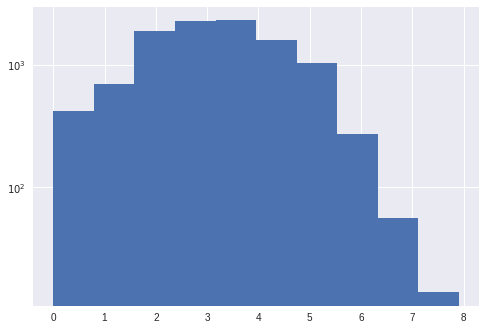

In [10]:
logs_projected_graph_words = np.log(degrees_projected_graph_words)
plt.hist(logs_projected_graph_words, log=True)

e_words, l_words, s_words = powerlaw.fit(degrees_projected_graph_words)
e_words, l_words, s_words

Se puede observar que tanto la red original como las proyecciones tienen distribuciones que se acercan a power law, lo cual es un buen indicio de que las redes pueden entragar datos interesantes y reales. 

## Componentes de las redes
A continuación se hallan los componentes gigantes de las redes, es decir, de la red bipartita completa y sus proyecciones. Las comunidades y preguntas se responderán a partir de los componentes gigantes que son los que tienen información relevante en estas redes. Muchas palabras usadas una sóla vez por uno o pocos usuarios quedan apartadas formando pequeños componentes que no son relevantes. Además varios de estos componentes pueden ser palabras que sólo un usario uso, por lo que se vuelven nodos de grado cero en la proyección de palabras.

Se debe mencionar que durante este estudio se miraron los tamaños de los componentes encontrados y la diferencia en tamaño con el componente gigante justificaba su omisión.

In [7]:
# Código para hallar el componente gigante de la red de usuarios y palabras
tweets_users_words_components = sorted(nx.connected_component_subgraphs(tweets_users_words_graph), key = len, reverse=True)
giant_component = tweets_users_words_components[0]
giant_component_edges = giant_component.edges()
print("Nodos del componente gigante de la red de usuarios y palabras:", len(giant_component.nodes()))
print("Enlaces del componente gigante de la red de usuarios y palabras:", len(giant_component_edges))
print()

# Código para hallar el componente gigante de la red de usuarios
projected_graph_users_components = sorted(nx.connected_component_subgraphs(projected_graph_users), key = len, reverse=True)
giant_component_users = projected_graph_users_components[0]
giant_component_users_edges = giant_component_users.edges()
print("Nodos del componente gigante de la red de usuarios:", len(giant_component_users.nodes()))
print("Enlaces del componente gigante de la red de usuarios:", len(giant_component_users_edges))
print()

# Código para hallar el componente gigante de la red de palabras
projected_graph_words_components = sorted(nx.connected_component_subgraphs(projected_graph_words), key = len, reverse=True)
giant_component_words = projected_graph_words_components[0]
giant_component_words_edges = giant_component_words.edges()
print("Nodos del componente gigante de la red de usuarios:", len(giant_component_words.nodes()))
print("Enlaces del componente gigante de la red de palabras:", len(giant_component_words_edges))

# Este fragmento de código comentado fue usado para el proceso de limpieza, ordenando las palabras por grado

# degrees_giant_component_words = sorted(giant_component_words.degree().items(), key=operator.itemgetter(1), reverse=True)
# words_file = open("palabras_ordenadas_por_grado.txt", 'w', encoding="utf8")
# for k in degrees_giant_component_words:
#     print(k, file=words_file)


NameError: name 'nx' is not defined

## Coeficiente de Clustering

In [17]:
avg_clustering_tweets_users_words_graph = nx.average_clustering(tweets_users_words_graph)
print("Promedio del coeficiente de clustering de la red de usuarios y palabras:", avg_clustering_tweets_users_words_graph)

avg_clustering_projected_graph_users = nx.average_clustering(projected_graph_users)
print("Promedio del coeficiente de clustering de la red de usuarios:", avg_clustering_projected_graph_users)
N_users = len(projected_graph_users.nodes())
edges_user = projected_graph_users.edges()
p_users = (2*len(edges_user))/(N_users*(N_users-1))
random_graph_users = nx.gnp_random_graph(N_users,p_users)
avg_clustering_random_graph_users = nx.average_clustering(random_graph_users)
print("Promedio del coeficiente de clustering de la red aleatoria de usuarios:", avg_clustering_random_graph_users)

avg_clustering_projected_graph_words = nx.average_clustering(projected_graph_words)
print("Promedio del coeficiente de clustering de la red de palabras:", avg_clustering_projected_graph_words)
N_words = len(projected_graph_words.nodes())
edges_words = projected_graph_words.edges()
p_words = (2*len(edges_words))/(N_words*(N_words-1))
random_graph_words = nx.gnp_random_graph(N_words,p_words)
avg_clustering_random_graph_words = nx.average_clustering(random_graph_words)
print("Promedio del coeficiente de clustering de la red aleatoria de palabras:", avg_clustering_random_graph_words)

Promedio del coeficiente de clustering de la red de usuarios y palabras: 0.0


NameError: name 'projected_graph_users' is not defined

Los coeficientes de clustering obtenidos anteriormente tienen sentido y dan un buen indicio para encontrar comunidades. Es normal que el coeficiente sea cero en la red bipartita pues esta no tiene triangulos, y este coeficiente tiende a medir los triangulos que se pueden formar en una red. Para las proyecciones es un buen valor pues si este número es significativamente mayor que el coeficiente de clustering ofrecido por una red aleatoria con las mismas caracteristicas, significa que hay un buen indice de encontrar comunidades. 

## Archivos con las redes
Los siguientes metodos sirven para guardar las redes en formatos de archivo que Gephi pueda leer. 

In [6]:
def export_network_file(network_edges, file_name):
    network_edges_file = open(file_name, 'w')
    print('Source\tTarget\tType', file=network_edges_file)
    for k, v in sorted(network_edges):
        print(k+'\t'+v+'\tUndirected', file=network_edges_file)

# export_network_file(giant_component_users_edges, 'giant_component_users_weights_edges_file.txt')
# export_network_file(giant_component_words_edges, 'giant_component_words_weights_edges_file.txt')

NameError: name 'giant_component_users_edges' is not defined

In [19]:
def export_to_gephi(G, file_name):
    nx.write_gexf(G, file_name)
# export_to_gephi(giant_component, "giant_component_gephi.gexf")
# export_to_gephi(giant_component_words, "giant_component_words_gephi.gexf")
# export_to_gephi(giant_component_users, "giant_component_users_gephi.gexf")

## Comunidades
A continuación se hallan comunidades en la proyección de palabras con el fin de responder las preguntas planteadas. Se comparan las comunidades encontradas con gephi y con el metodo de Louvain, las cuales usan el mismo método. Esto se hace con el fin de validar que las comunidades encontradas si tengan sentido o se parezcan, ya que el metodo puede arrojar diferentes resultados en las corridas (optimos locales).

No se hallan comunidades en la proyección de usuarios porque visualmente las palabras brindan más información del tipo de comunidad y a partir de ellas se pueden obtener los usuarios que las usaron, es decir, a la hora de segmentar el mercado, la relación de las palabras, reflejará la relación de los usuarios.

In [20]:
# Código para hallar las comunidades usando NetworkX y el módulo community
partition = community.best_partition(giant_component_words)
# Se agregan las comunidades escogidas como atributos de los nodos
# Esto se hace con el fin de pintar las comunidades obtenidas con NetworkX en Gephi
nx.set_node_attributes(giant_component_words, 'louvain', partition)

# El código que está comentado a continuación exporta el archivo con las comunidades obtenidas
# export_to_gephi(giant_component_words, "giant_component_words_gephi_louvain.gexf")

AttributeError: module 'community' has no attribute 'best_partition'

## Resultados de las comunidades
A continuación se muestran los resultados de las comunidades obtenidas y se hace la interpretación respectiva. Cabe resaltar que al ser tantas palabras las comunidades pueden tener diferentes interpretaciones pero es posible notar en todas patrones en común. Todas las imagenes que se muestran a continuación se pueden encontrar en la carpeta del proyecto debidamente ordenadas. 

<div class="row">
    <h3>1. Comunidad relacionada con amor, sentimientos y relaciones:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_amor_relaciones_sentimientos.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_amor_relaciones_sentimientos.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 1891 (18.2%)</p>
        <p>Enlaces: 16887 (7.37%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 2094 (20.15%)</p>
        <p>Enlaces: 21740 (7.37%)</p>
    </div>
</div>

<div class="row">
    <h3>2. Comunidad relacionada con palabras en portugués:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_brasil_idiomas.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_brasil_idiomas.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Louvain zoom </h4>
        <img src="comunidades_louvain/com_brasil_zoom.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi zoom </h4>
        <img src="comunidades_gephi/com_brasil_zoom.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 843 (8.11%)</p>
        <p>Enlaces: 28947 (9.81%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 871 (20.15%)</p>
        <p>Enlaces: 28199 (9.56%)</p>
    </div>
</div>

<div class="row">
    <h3>3. Comunidad relacionada con palabras en inglés:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_ingles.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_ingles.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 841 (8.09%)</p>
        <p>Enlaces: 12239 (4.15%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 733 (7.05%)</p>
        <p>Enlaces: 11140 (3.78%)</p>
    </div>
</div>

<div class="row">
    <h3>4. Comunidad relacionada con jovenes, amor y dedicatorias:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_amor_joven_cumplidos_dedicatorias.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_amor_joven_cumplidos_dedicatorias.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 406 (3.91%)</p>
        <p>Enlaces: 3689 (1.25%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 673 (6.48%)</p>
        <p>Enlaces: 6239 (2.11%)</p>
    </div>
</div>

<div class="row">
    <h3>5. Comunidad relacionada con momentos, recuerdos y musica:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_recuerdos_momentos_relaciones_musica.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_recuerdos_momentos_relaciones_musica.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 723 (6.96%)</p>
        <p>Enlaces: 12800 (4.34%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 633 (6.09%)</p>
        <p>Enlaces: 10988 (3.72%)</p>
    </div>
</div>

<div class="row">
    <h3>6. Comunidad relacionada con religión y espiritualidad:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_religion_espiritualidad.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_religion_espiritualidad.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 588 (5.66%)</p>
        <p>Enlaces: 10793 (3.66%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 631 (6.07%)</p>
        <p>Enlaces: 11566 (3.92%)</p>
    </div>
</div>

<div class="row">
    <h3>7. Comunidad relacionada con el proceso de paz y el gobierno:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_paz_gobierno_social.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_paz_gobierno_social.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 417 (4.01%)</p>
        <p>Enlaces: 5517 (1.87%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 586 (5.64%)</p>
        <p>Enlaces: 7142 (2.42%)</p>
    </div>
</div>

<div class="row">
    <h3>8. Comunidad relacionada con quejas, insultos y comentarios populares:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/comunidad_insultos_quejas_popular.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/comunidad_insultos_quejas_popular.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 635 (6.11%)</p>
        <p>Enlaces: 12763 (4.33%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 559 (5.38%)</p>
        <p>Enlaces: 10022 (3.4%)</p>
    </div>
</div>

<div class="row">
    <h3>9. Comunidad relacionada con tristeza, decepciones y amigos:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_tristeza_decepcion_amigos.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_tristeza_decepcion_amigos.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 541 (5.21%)</p>
        <p>Enlaces: 10063 (3.41%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 553 (5.32%)</p>
        <p>Enlaces: 10620 (3.6%)</p>
    </div>
</div>

<div class="row">
    <h3>10. Comunidad relacionada con soledad y rompimiento de relaciones:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_soledad_terminacion.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_soledad_terminacion.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 679 (6.53%)</p>
        <p>Enlaces: 11539 (3.91%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 496 (4.77%)</p>
        <p>Enlaces: 9615 (3.26%)</p>
    </div>
</div>

<div class="row">
    <h3>11. Comunidad relacionada con temas de mujeres o feminismo:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_temas_mujeres_feminismo.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_temas_mujeres_feminismo.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 802 (7.72%)</p>
        <p>Enlaces: 11114 (3.77%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 423 (4.07%)</p>
        <p>Enlaces: 5758 (1.95%)</p>
    </div>
</div>

<div class="row">
    <h3>12. Comunidad relacionada con lugares, países, ciudades y situaciones de América Latina:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_global_geografica_lugares_latina.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_global_geografica_lugares_latina.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 507 (4.88%)</p>
        <p>Enlaces: 3755 (1.27%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 399 (3.84%)</p>
        <p>Enlaces: 3195 (1.08%)</p>
    </div>
</div>

<div class="row">
    <h3>13. Comunidad relacionada con planes en casa y actividades de ocio (programas de tv):</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_planes_casa.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_planes_casa.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 301 (2.9%)</p>
        <p>Enlaces: 7038 (2.39%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 368 (3.54%)</p>
        <p>Enlaces: 8210 (2.78%)</p>
    </div>
</div>

<div class="row">
    <h3>14. Comunidad relacionada con servicios públicos, quejas y problemas:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_servicios_quejas_problemas_publico.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_servicios_quejas_problemas_publico.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 258 (2.48%)</p>
        <p>Enlaces: 5127 (1.74%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 326 (3.14%)</p>
        <p>Enlaces: 5579 (1.89%)</p>
    </div>
</div>

<div class="row">
    <h3>15. Comunidad relacionada con política y libre expresión:</h3>
    <div class="col-md-6"> <h4> Louvain </h4>
        <img src="comunidades_louvain/com_pueblo_politica_libre_expresion.png"  class="img-responsive" />
    </div>
    <div class="col-md-6"> <h4> Gephi </h4>
        <img src="comunidades_gephi/com_pueblo_politica_libre_expresion.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-6">
        <p>Nodos: 484 (4.66%)</p>
        <p>Enlaces: 7012 (2.38%)</p>
    </div>
    <div class="col-md-6">
        <p>Nodos: 291 (2.8%)</p>
        <p>Enlaces: 5188 (1.76%)</p>
    </div>
</div>

<div class="row">
    <h3>16. Comunidad relacionada con olvido y desamor (Sólo en Gephi):</h3>
    <div class="col-md-12">
        <img src="comunidades_gephi/com_canciones_olvido_desamor.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-12">
        <p>Nodos: 149 (1.43%)</p>
        <p>Enlaces: 1789 (0.61%)</p>
    </div>
</div>

<div class="row">
    <h3>17. Comunidad relacionada con la costa y vallentos (Sólo con Louvain - NetworkX):</h3>
    <div class="col-md-12">
        <img src="comunidades_louvain/com_costa_vallentos.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-12">
        <p>Nodos: 236 (2.27%)</p>
        <p>Enlaces: 1668 (0.57%)</p>
    </div>
</div>

<div class="row">
    <h3>18. Comunidad relacionada con sexo y relaciones (Sólo en Gephi):</h3>
    <div class="col-md-12">
        <img src="comunidades_louvain/com_sexo_relaciones.png"  class="img-responsive" />
    </div>
</div>
<div class="row">
    <div class="col-md-12">
        <p>Nodos: 106 (1.02%)</p>
        <p>Enlaces: 655 (0.22%)</p>
    </div>
</div>

Se pueden apreciar comunidades con elementos en común de acuerdo a los resultados mostrados anteriormente. Aunque la interpretación de cada comunidad puede variar, según la persona que la vea, se debe resaltar que cada una tiene palabras que pueden clasificarse en tópicos similares a los aquí expuestos. Las comunidades que tienen palabras en otros idiomas sirven para validar los algoritmos de comunidades pues es de esperarse que queden juntas dichas palabras en alguna comunidad.

## Medidas de centralidad usadas
Las medidas de centralidad usadas en estas redes fueron betweenness centrality y degree centrality. En las comunidades dibujadas anteriormente los nodos más grandes son los que tienen estas dos medidas con valores más altos. Esto se justifica porque son medidas que, para el contexto de palabras y procesamiento del lenguaje natural, brindan más información acerca de la importancia de un nodo. Betweenness centrality puede significar cuales los palabras se encuentran en la mayoría de los tweets en una comunidad y degree centrality denota la cantidad de veces que puede ser usada una palabra por distintos usuarios.

Por las razones anteriores estas fueron las medidas usadas para mostrar la importancia de los nodos. Para conocer los valores, dentro de la carpeta del proyecto se encuentra el archivo del proyecto de gephi donde se graficaron las diferentes redes y se calcularon las medidas consideradas como más representativas en este contexto. 

## Respuestas a las pregutas
<div class="alert alert-success" role="alert">
<p>¿Qué comunidades se pueden encontrar entre usuarios a partir del lenguaje que usan?</p>
<p>Respuesta: Se pueden encontrar comunidades como las mostradas en el punto anterior, es decir, se pueden apreciar comunidades de personas en relaciones de pareja, de personas que dedican canciones a través de twitter, de política, de personas que comentan situaciones de sus ciudades y países, de jovenes y musica juvenil, de problemas gubernamentales, entre otras.</p>
</div>
<div class="alert alert-success" role="alert">
<p>¿Qué temas se pueden identificar como más comentados por los usuarios?</p>
<p>Respuesta: Los temas más comentados son los relacionados con sentimientos y relaciones amorosas. También se pueden destacar los temas religiosos y los espirituales.</p>
</div>
<div class="alert alert-success" role="alert">
<p>¿Es posible identificar algún segmento de mercado en las comunidades obtenidas?</p>
<p>Respuesta: Es posible identificar varios segmentos de mercado, entre ellos están: gente joven, música romantica, restaurantes, música de despecho, reality shows, youtubers, entre otros. 
</div>
<div class="alert alert-success" role="alert">
<p>¿Es posible pensar en un producto que se pueda ofrecer a alguna de las comunidades obtenidas?</p>
<p>Respuesta: De acuerdo a los segmentos de mercado identificados, se pueden recomendar productos como subscripciones a servicios de música como Spotify o Deezer. También se pueden recomendar restaurantes y platos de comida. No sobra mencionar productos religiosos o espirituales.</p>
</div>